<a href="https://colab.research.google.com/github/MathieuFan22/TP-ML-Mirada/blob/Partie-A/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Affichage des données
df = pd.read_csv("Mall_Customers.csv")
print("Affichage des données :")
df.head(10)

Affichage des données :


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [66]:
# nettoyage et prétraitement
print("Nombre de valeur manquante :")
print(df.isnull().sum())
if df.isnull().sum().sum() == 0:
  print("Il n'y a aucune valeur manquante")
else:
  # Les valeurs manquantes sont remplies par la moyenne des colonnes numériques
  df.fillna(df.mean(numeric_only=True))

Nombre de valeur manquante :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Il n'y a aucune valeur manquante


In [67]:
# Standardisation des variables
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Affichage des premières lignes standardisées
print("Tableau contenant les données numériques standardisées :")
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Income', 'Score'])
X_scaled_df.head(10)

Tableau contenant les données numériques standardisées :


,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
5,-1.209269,-1.662660,1.001596
6,-0.276302,-1.624491,-1.715913
7,-1.137502,-1.624491,1.700384
8,1.804932,-1.586321,-1.832378
9,-0.635135,-1.586321,0.846310


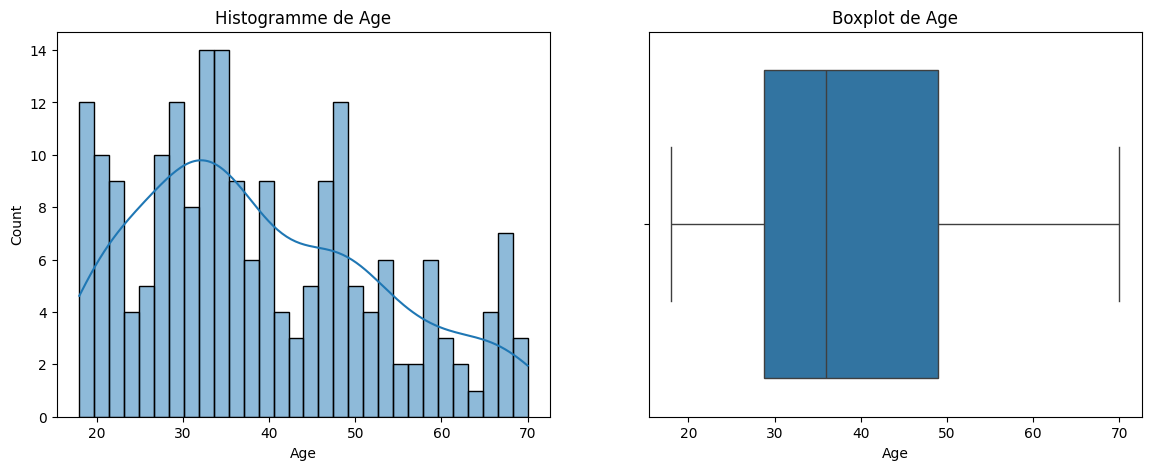

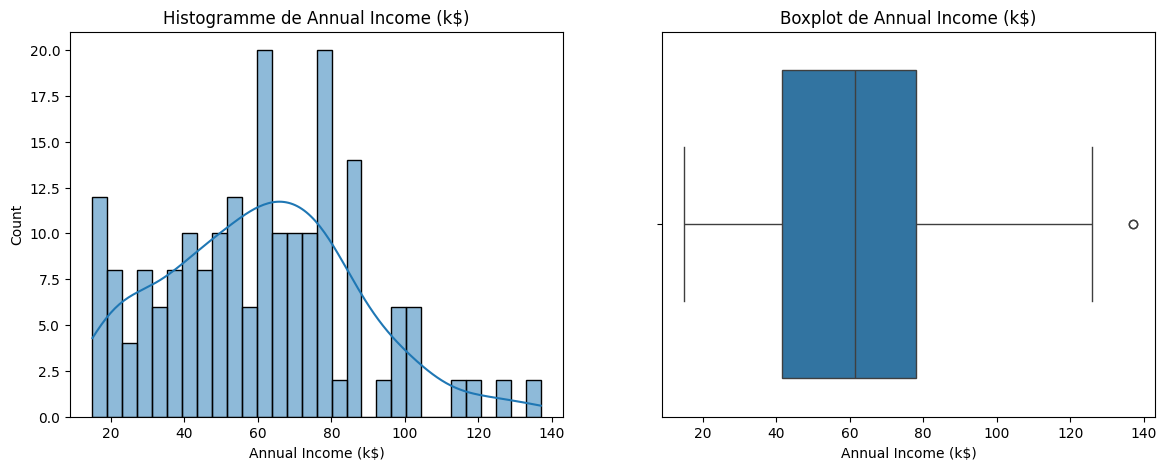

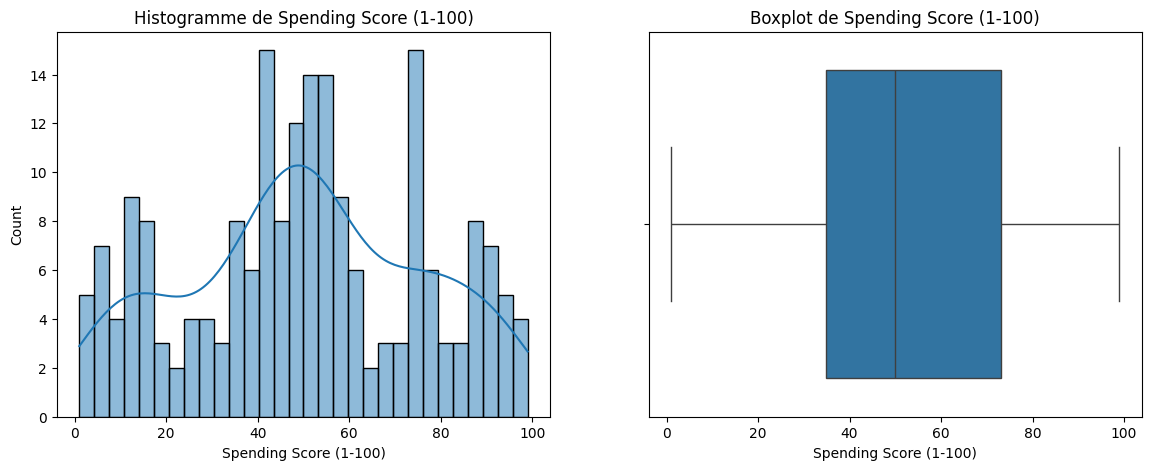

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA univariée et multivariée
# histogramme et Boxplot des variables quantitatives : age, annual income, spending score
quantitative_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for var in quantitative_vars:
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogramme de {var}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

    plt.show()

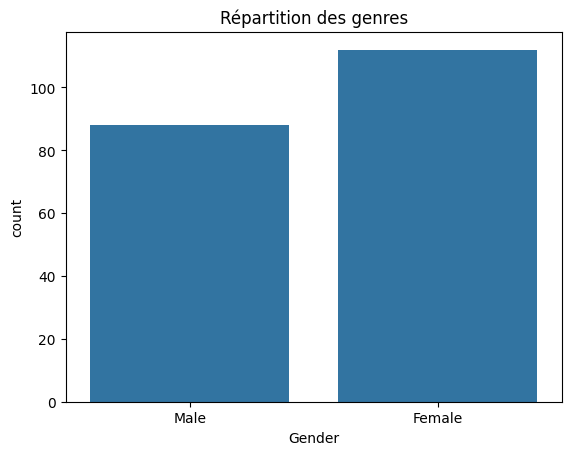

In [69]:
# Variable Gender
sns.countplot(data=df, x='Gender')
plt.title('Répartition des genres')
plt.show()

# Gender est qualitatif => pas adapté à un boxplot(affiche la répartition d’une variable quantitative)

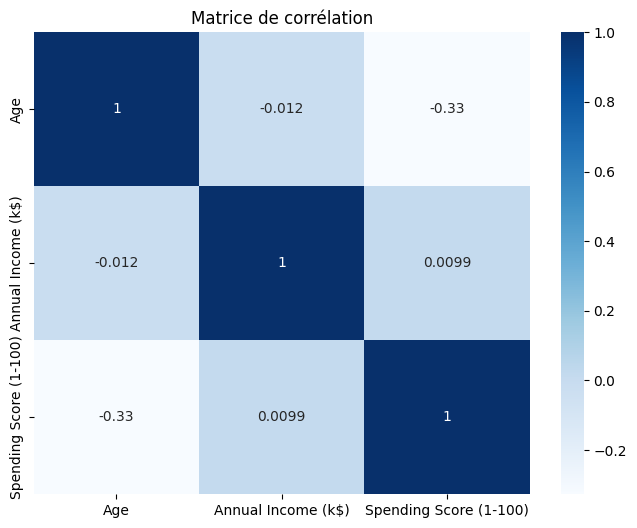

In [70]:
# matrice de corrélation
plt.figure(figsize=(8,6))
corr = df[quantitative_vars].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matrice de corrélation')
plt.show()

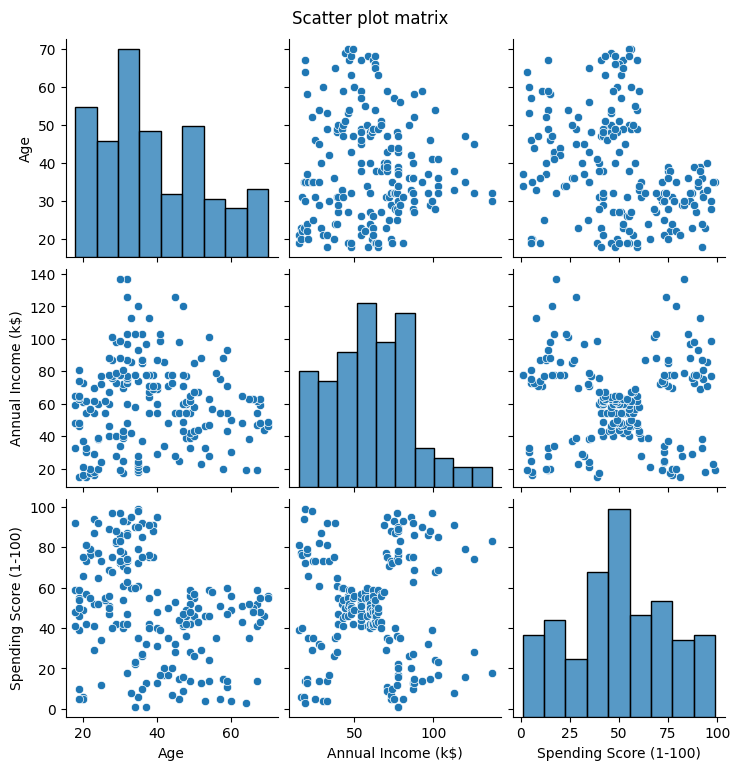

In [71]:
# scatter plot matrix
sns.pairplot(df[quantitative_vars])
plt.suptitle('Scatter plot matrix', y=1.02)
plt.show()

In [72]:
# feature engineering et sélection

# efface les variables non informatives
df = df.drop(columns=['CustomerID'])
df = df.drop(columns=['Gender'])

# Catégorise le groupe d'âge
def age_category(age):
    if age < 25:
        return 'Jeune'
    elif age < 50:
        return 'Adulte'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_category)

# Catégorise le revenu annuel
def revenu_group(income):
    if income < 40:
        return 'Faible'
    elif income <= 70:
        return 'Moyen'
    else:
        return 'Élevé'

df['RevenuGroup'] = df['Annual Income (k$)'].apply(revenu_group)

# Catégorise le score de dépense
def score_group(score):
    if score < 40:
        return 'Bas'
    elif score <= 70:
        return 'Moyen'
    else:
        return 'Élevé'

df['ScoreGroup'] = df['Spending Score (1-100)'].apply(score_group)

# affichage du dataset
print("Aperçu du dataset après nettoyage et catégorisation des variables :")
df[['Age', 'AgeGroup', 'Annual Income (k$)', 'RevenuGroup', 'Spending Score (1-100)', 'ScoreGroup']].head(10)

Aperçu du dataset après nettoyage et catégorisation des variables :


,Age,AgeGroup,Annual Income (k$),RevenuGroup,Spending Score (1-100),ScoreGroup
0,19,Jeune,15,Faible,39,Bas
1,21,Jeune,15,Faible,81,Élevé
2,20,Jeune,16,Faible,6,Bas
3,23,Jeune,16,Faible,77,Élevé
4,31,Adulte,17,Faible,40,Moyen
5,22,Jeune,17,Faible,76,Élevé
6,35,Adulte,18,Faible,6,Bas
7,23,Jeune,18,Faible,94,Élevé
8,64,Senior,19,Faible,3,Bas
9,30,Adulte,19,Faible,72,Élevé


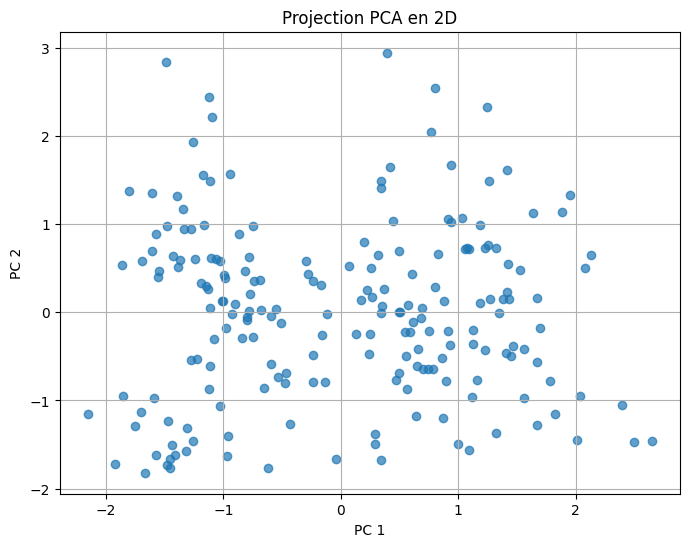

In [74]:
from sklearn.decomposition import PCA

# réduction de dimension

# réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# visualisation
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2']) # Conversion en DataFrame pour affichage
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.title('Projection PCA en 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()